In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("FuelConsumption.csv")

In [3]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
data2 = data[['ENGINESIZE', 'CYLINDERS', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB_MPG']]

In [6]:
data2.head(9)

,ENGINESIZE,CYLINDERS,CO2EMISSIONS,FUELCONSUMPTION_COMB_MPG
0,2.0,4,196,33
1,2.4,4,221,29
2,1.5,4,136,48
3,3.5,6,255,25
4,3.5,6,244,27
5,3.5,6,230,28
6,3.5,6,232,28
7,3.7,6,255,25
8,3.7,6,267,24


array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'CO2EMISSIONS'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_COMB_MPG'}>]],
      dtype=object)

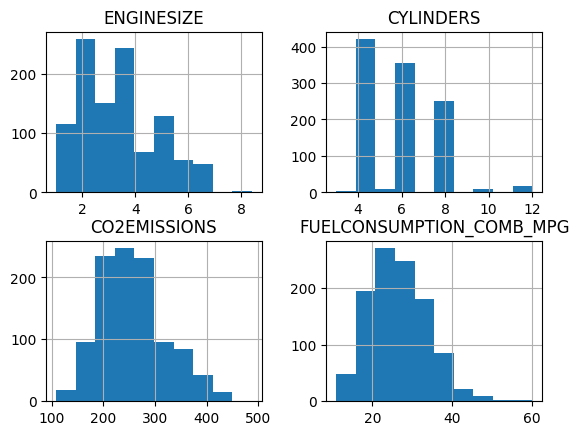

In [7]:
viz = data2[['ENGINESIZE', 'CYLINDERS', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB_MPG']]
viz.hist()

Text(0, 0.5, 'CO2EMISSION')

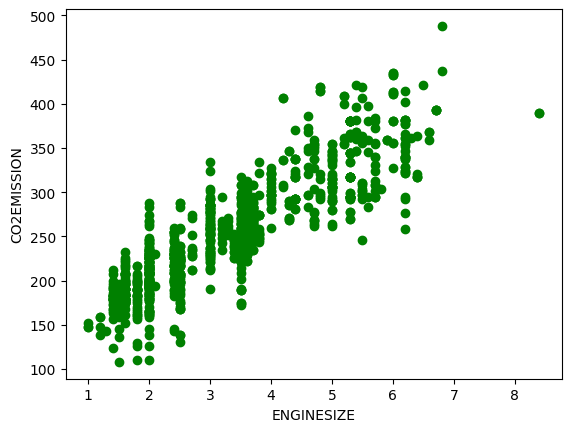

In [8]:
plt.scatter(data2.ENGINESIZE, data2.CO2EMISSIONS, color='green')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSION')

Text(0, 0.5, 'CO2EMISSION')

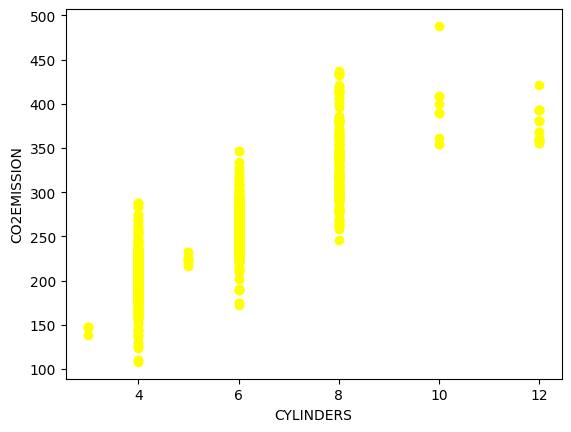

In [9]:
plt.scatter(data2.CYLINDERS, data2.CO2EMISSIONS, color='yellow')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSION')

Text(0, 0.5, 'CO2EMISSIONS')

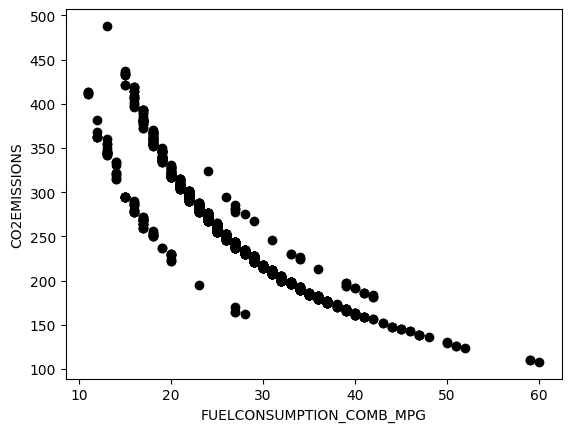

In [10]:
plt.scatter(data2.FUELCONSUMPTION_COMB_MPG, data2.CO2EMISSIONS, color='black')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2EMISSIONS')

In [11]:
m = np.random.rand(len(data))<0.8
train = data2[m]
test = data2[~m]

In [12]:
from sklearn import linear_model

In [26]:
lr = linear_model.LinearRegression()

In [27]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

In [28]:
lr.fit(train_x, train_y)

LinearRegression()

In [29]:
print("Coefficient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficient:  [[38.75604868]]
Intercept:  [126.13620846]


Text(0, 0.5, 'Emission')

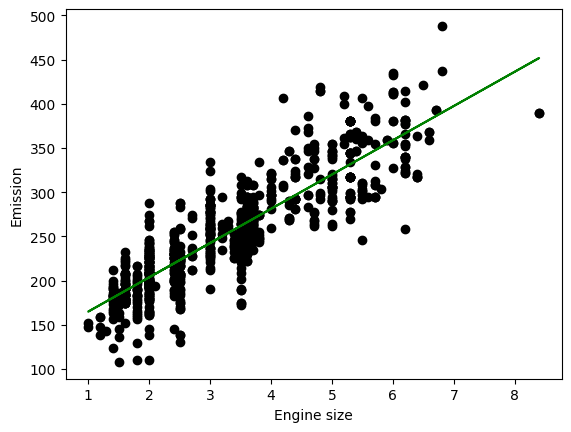

In [32]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='black')
plt.plot(train_x, lr.coef_[0][0]*train_x + lr.intercept_[0], '-g')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [34]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = lr.predict(test_x)

In [35]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 24.31
Residual sum of squares (MSE): 1069.61
R2-score: 0.76
